In [3]:
import os
import urllib
import urllib.request
import cv2
import mlflow

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from zipfile import ZipFile
import sys
# sys.path.append(r'../src')

import model
from utils import one_hot_encode_index
from optimizers import Adam
from activations import Softmax, ReLU
from layers import Dropout, LinearLayer, ConvolutionLayer, PoolingLayer
from loss import CategoricalCrossEntropyLoss


## Loading Data

In [4]:
# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    y = one_hot_encode_index(y, 10)
    y_test = one_hot_encode_index(y_test, 10)
    
    # And return all the data
    return X, y, X_test, y_test

In [5]:
path0 = '/Users/petermagnusson/Documents/data/courses to study/malmö universitet/3 ht2021/120p 2yrs MSc copmuter science - applied data science/course AI for data science/project/leaf/data/fashion_mnist_images'

# X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')
X, y, X_test, y_test = create_data_mnist(path0)

In [6]:
def print_info(a):
    print('shapes for inputs and outputs:')
    print(a.shape)
    print('(min, max) for inputs and outputs:')
    print(np.min(a), np.max(a))

### Reshaping data: 

In [34]:
def add_channles(v):
    return np.expand_dims(v, axis=1)

X_chns = add_channles(X)
X_chns_test = add_channles(X_test)

print_info(X)
print_info(X_chns)
print_info(X_chns_test)

shapes for inputs and outputs:
(60000, 28, 28)
(min, max) for inputs and outputs:
0 255
shapes for inputs and outputs:
(60000, 1, 28, 28)
(min, max) for inputs and outputs:
0 255
shapes for inputs and outputs:
(10000, 1, 28, 28)
(min, max) for inputs and outputs:
0 255


In [35]:
def vectorize(v):
    return v.reshape(v.shape[0], -1)

X_flat = vectorize(X)
X_flat_test = vectorize(X_test)

In [36]:
print_info(X)
print_info(X_flat)

shapes for inputs and outputs:
(60000, 28, 28)
(min, max) for inputs and outputs:
0 255
shapes for inputs and outputs:
(60000, 784)
(min, max) for inputs and outputs:
0 255


### Create a model sequence:

In [37]:
cce_loss = CategoricalCrossEntropyLoss()
optimizer = Adam(decay=5e-5)
my_model = model.Model(optimizer, cce_loss)

my_model.set_sequence([
                ConvolutionLayer(1, 3)
                # LinearLayer(X_flat.shape[1], 128),
                # ReLU(),
                # Dropout(0.5),
                # LinearLayer(128, 128),
                # ReLU(),
                # LinearLayer(128, 10),
                # Softmax()
            ])

In [38]:
my_model.train(X_chns, y, epochs=1, batch_size=78, validation=(X_chns_test, y_test))
# my_model.train(X_flat, y, epochs=1, batch_size=78, validation=(X_flat_test, y_test))

=== Epoch: 1 ===


ValueError: shapes (78,1,28,28) and (784,128) not aligned: 28 (dim 3) != 784 (dim 0)

### Train with the model:

In [ ]:
my_model.train(X_flat, y, epochs=10, batch_size=128, validation=(X_flat_test, y_test))

=== Epoch: 1 ===
Step: 0/469, accuracy0.000, loss16.118, learning rate 0.0010000 
Step: 100/469, accuracy0.047, loss15.363, learning rate 0.0009950 
Step: 200/469, accuracy0.992, loss0.149, learning rate 0.0009901 
Step: 300/469, accuracy0.000, loss2.278, learning rate 0.0009852 
Step: 400/469, accuracy0.000, loss2.644, learning rate 0.0009804 
Step: 468/469, accuracy0.802, loss0.516, learning rate 0.0009771 
Epoch: 1/10, accuracy0.603, loss2.648, learning rate 0.001
--Validation--
Validation : Accuracy: 0.197, Loss: 7.789
=== Epoch: 2 ===
Step: 0/469, accuracy0.000, loss12.470, learning rate 0.0009771 
Step: 100/469, accuracy0.000, loss2.577, learning rate 0.0009723 
Step: 200/469, accuracy0.000, loss2.492, learning rate 0.0009676 
Step: 300/469, accuracy0.000, loss2.263, learning rate 0.0009630 
Step: 400/469, accuracy0.000, loss2.306, learning rate 0.0009584 
Step: 468/469, accuracy0.833, loss0.445, learning rate 0.0009552 
Epoch: 2/10, accuracy0.082, loss2.406, learning rate 0.001


### Display

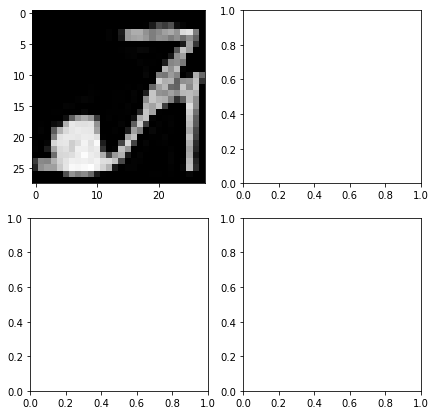

In [ ]:
fig, ax = plt.subplots(figsize=(7.00, 7.00), ncols=2, nrows=2)
# fig, ax = plt.subplots()
# ax.imshow(c[0, 0, :, :], cmap=cm.gray)
ax[0, 0].imshow(X[int(np.random.randint(0,60000)), :, :], cmap=cm.gray)
# ax[0, 1].imshow(pool1.outputs[0, 0, :, :], cmap=cm.gray)
# ax[1, 0].imshow(pool1.dinputs[0, 0, :, :], cmap=cm.gray)
# ax[1, 1].imshow(conv1.outputs[0, 1, :, :], cmap=cm.gray)
plt.show()